In [23]:
import pandas as pd

In [24]:
df = pd.read_csv('Reviews.csv') 

View Data

In [25]:
df.head()  

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [26]:
df.sample(3) 

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
142153,142154,B003GTR8IO,A3PLXROA2VNLHA,"IndigoHeirlooms ""indigoheirlooms""",2,3,1,1291766400,Can't be called coffee,Can I give it no stars?<br /><br />The bag arr...
120696,120697,B005K4Q37A,AXZ1DJR5XAVNB,Jerry McKeever,2,4,1,1328572800,WAKE UP PEOPLE You are being scammed !,This company is scamming everyone. They put i...
364214,364215,B003XFOXQ6,A19IGF1VFQ64AJ,Samuel Hamilton,0,0,4,1311120000,Healthy breakfast,This is a healthy breakfast. It hasn't change...



Inspect Structure

In [27]:
df.shape              # Rows and columns
df.columns            # Column names
df.info()             # Data types and nulls
df.describe()         # Summary stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


Handling Missing Data

In [28]:

df.isnull().sum()                     # Count nulls
df.dropna(inplace=True)              # Drop rows with any nulls


Removing Duplicates

In [29]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

Remove exact duplicates (same review and rating)

In [30]:
df = df.drop_duplicates(subset=['Summary', 'Score'])

Remove conflicting reviews (same text but different ratings)

In [31]:
# Find conflicting reviews
conflicts = df.groupby('Summary')['Score'].nunique()
conflicting_texts = conflicts[conflicts > 1].index

# Remove them
df = df[~df['Summary'].isin(conflicting_texts)]

print("After removing conflicting reviews:", df.shape)


After removing conflicting reviews: (287242, 10)


In [32]:
df.to_csv('data/cleaned_data.csv', index=False)

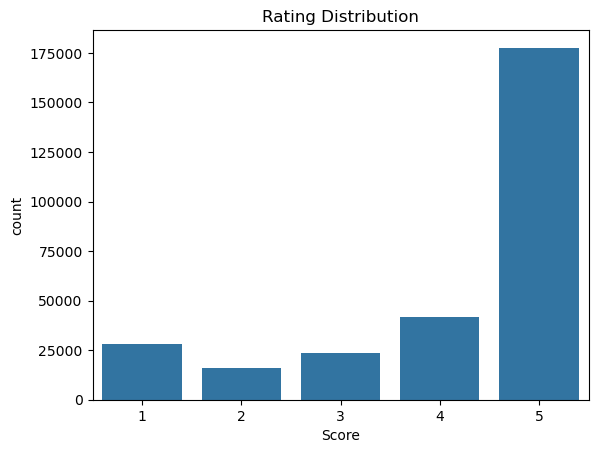

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="Score", data=df)
plt.title("Rating Distribution")
plt.show()


Creating a Balanced Dataset for initial training and prototyping

In [34]:
df["Score"].value_counts()

Score
5    177585
4     41893
1     27918
3     23819
2     16027
Name: count, dtype: int64

In [35]:
min_count = 2000

df_balanced = (
    df.groupby("Score")
      .sample(min_count, random_state=42)
)

print(df_balanced["Score"].value_counts())


Score
1    2000
2    2000
3    2000
4    2000
5    2000
Name: count, dtype: int64


In [36]:
df_balanced.to_csv("balanced_reviews.csv", index=False)

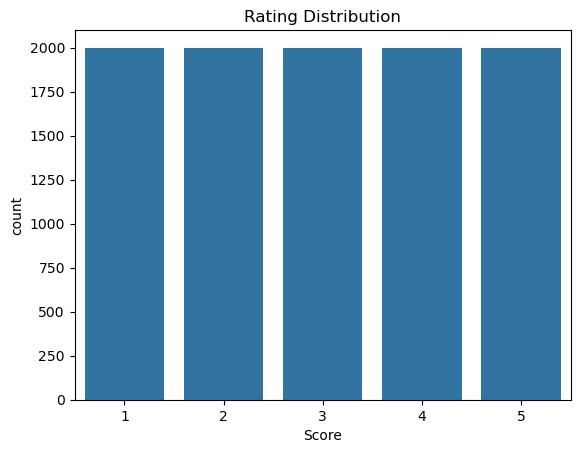

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="Score", data= pd.read_csv('balanced_reviews.csv'))
plt.title("Rating Distribution")
plt.show()


In [38]:
df.shape
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [39]:
df = df.drop(columns=["Id", "ProductId", "UserId","ProfileName","HelpfulnessNumerator","HelpfulnessDenominator","Time","Summary"])

In [42]:
df.columns

Index(['Score', 'Text'], dtype='object')

In [49]:
df.to_csv("updated_data.csv", index=False)